# Forelesning 8: Dynamiske systemer

__Oppgave__: Vi kan lage bindingsmodeller som enkle "fjærmodeller". Da ser vi på atomene som kuler som henger i hver sin ende av en fjær. Dersom fjæra er stiv (høy "fjærkonstant"), vibrerer atomene mye, og motsatt. Enkle fjærkrefter følger Hooks lov:

$$F = -k\cdot (x - x_0)$$

er _x_ er posisjonen og $x_0$ er likevektsposisjonen, dvs. posisjonen der fjæra ikke er komprimert eller strukket ut. Fyll inn det som mangler i programmet nedenfor:

<iframe src="https://trinket.io/embed/python3/2d5191d8cf" width="100%" height="600" frameborder="0" marginwidth="0" marginheight="0" allowfullscreen></iframe>

__Menti__: https://www.menti.com/mvbm6ic2yq

## Fartslover (ratelover)
Vi bruker følgende reaksjon som eksempel:

$$ H_2 (g) + I_2 (g) \rightarrow 2HI (g)$$

Vi har følgende ratelov for reaksjonen:

$$\frac{d[HI]}{dt} = k_r[H_2][I_2]$$

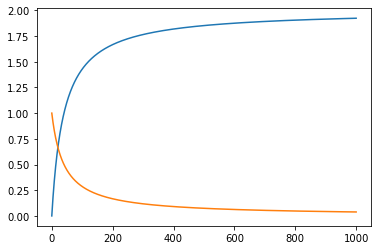

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Initialbetingelser
H0 = 1  # mol/L
I0 = 1  # mol/L
HI0 = 0  # mol/L
t0 = 0  # starttid i s
t_slutt = 1000 # tid i s
k = 5E-2

dt = 1E-3  # tidssteg
N = int((t_slutt-t0)/dt) + 1 # antall punkter

# Arrayer
H2 = np.zeros(N)
I2 = np.zeros(N)
HI = np.zeros(N)
t = np.zeros(N)

H2[0] = H0
I2[0] = I0
HI[0] = HI0
t[0] = t0

# Integrasjonsløkke
for i in range(N-1):
    # Ratelovene
    HIdt = k*H2[i]*I2[i]
    I2dt = -0.5*HIdt
    H2dt = I2dt
    # Eulers metode
    HI[i+1] = HI[i] + HIdt*dt
    H2[i+1] = H2[i] + H2dt*dt
    I2[i+1] = I2[i] + I2dt*dt
    t[i+1] = t[i] + dt

plt.plot(t,HI)
plt.plot(t,H2)
plt.show()

## Bruk av biblioteker

In [3]:
from scipy.integrate import solve_ivp

In [7]:
def dydt(t, y):
    return y - t

a = 0
b = 5

t = np.linspace(a,b,1000)
y0 = 2

y_int = solve_ivp(dydt, [a,b], [y0], t_eval=t, method="BDF")

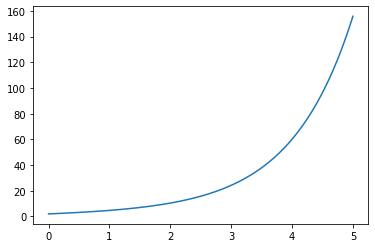

In [8]:
plt.plot(y_int.t, y_int.y[0])

In [9]:
def ratelover(t, y):
    HI = y[0]
    H2 = y[1]
    I2 = y[2]
    k = 5E-2
    dHIdt = k*H2*I2
    dI2dt = -0.5*dHIdt
    dH2dt = dI2dt
    return [dHIdt, dI2dt, dH2dt]

a = 0
b = 1000
t = np.linspace(a,b,100000)
y0 = [0, 1, 1]
y_int = solve_ivp(ratelover, [a,b], y0, t_eval = t, method='BDF')

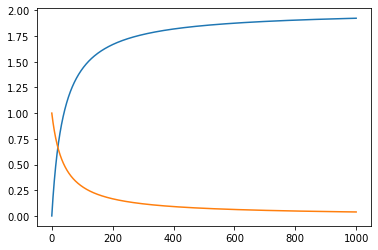

In [11]:
plt.plot(y_int.t, y_int.y[0])
plt.plot(y_int.t, y_int.y[1])